In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
#     FACE_connections has been renamed to facemesh_contours
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

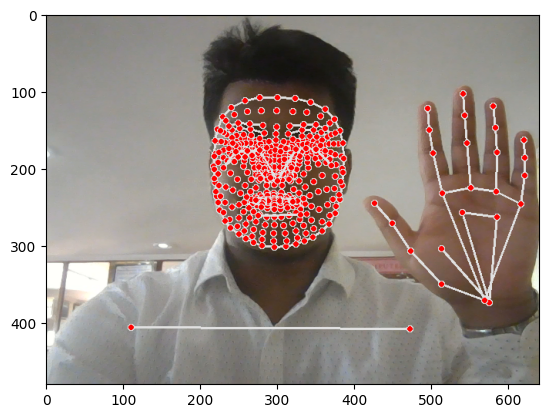

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [11]:
len(results.left_hand_landmarks.landmark)
len(results.left_hand_landmarks.landmark)


21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.4690845 ,  0.45124537, -1.27491641, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
468*3+33*4+21*3+21*3

1662

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.4690845 ,  0.45124537, -1.27491641, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
import os
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'yes'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [21]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}


In [25]:
label_map = {label:num for num, label in enumerate(actions)}


In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(sequences).shape


(90, 30, 1662)

In [28]:
np.array(labels).shape


(90,)

In [29]:
X = np.array(sequences)


In [30]:
X.shape


(90, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)


In [32]:
y


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [34]:
y_test.shape


(5, 3)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)


In [68]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [38]:
res = [.7, 0.2, 0.1]


In [39]:
actions[np.argmax(res)]


'hello'

In [69]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [41]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
3/3 [==============================] - 5s 57ms/step - loss: 1.1344 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.3406 - categorical_accuracy: 0.3882
Epoch 3/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.5511 - categorical_accuracy: 0.2118
Epoch 4/2000
3/3 [==============================] - 0s 50ms/step - loss: 10.4353 - categorical_accuracy: 0.4471
Epoch 5/2000
3/3 [==============================] - 0s 52ms/step - loss: 4.5881 - categorical_accuracy: 0.3765
Epoch 6/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.5653 - categorical_accuracy: 0.5765
Epoch 7/2000
3/3 [==============================] - 0s 53ms/step - loss: 28.4837 - categorical_accuracy: 0.3412
Epoch 8/2000
3/3 [==============================] - 0s 51ms/step - loss: 9.8814 - categorical_accuracy: 0.4471
Epoch 9/2000
3/3 [==============================] - 0s 51ms/step - loss: 21.2560 - categorical_accuracy: 0.435

3/3 [==============================] - 0s 55ms/step - loss: 1.0861 - categorical_accuracy: 0.5647
Epoch 74/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0102 - categorical_accuracy: 0.4824
Epoch 75/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.0928 - categorical_accuracy: 0.4000
Epoch 76/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.4182 - categorical_accuracy: 0.4824
Epoch 77/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.9779 - categorical_accuracy: 0.5529
Epoch 78/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.9678 - categorical_accuracy: 0.5529
Epoch 79/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.0428 - categorical_accuracy: 0.4000
Epoch 80/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.8905 - categorical_accuracy: 0.6941
Epoch 81/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.9847 - categorical_accuracy: 0.4706
Epoch 

3/3 [==============================] - 0s 65ms/step - loss: 0.2111 - categorical_accuracy: 0.9412
Epoch 146/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1897 - categorical_accuracy: 0.9412
Epoch 147/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1855 - categorical_accuracy: 0.9529
Epoch 148/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2375 - categorical_accuracy: 0.9412
Epoch 149/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1957 - categorical_accuracy: 0.9529
Epoch 150/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2488 - categorical_accuracy: 0.9529
Epoch 151/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2575 - categorical_accuracy: 0.9294
Epoch 152/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2843 - categorical_accuracy: 0.8941
Epoch 153/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4093 - categorical_accuracy: 0.917

3/3 [==============================] - 0s 61ms/step - loss: 0.9205 - categorical_accuracy: 0.6588
Epoch 218/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.8977 - categorical_accuracy: 0.7882
Epoch 219/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8271 - categorical_accuracy: 0.7059
Epoch 220/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7724 - categorical_accuracy: 0.7176
Epoch 221/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6773 - categorical_accuracy: 0.7882
Epoch 222/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6550 - categorical_accuracy: 0.7176
Epoch 223/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7450 - categorical_accuracy: 0.6353
Epoch 224/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7514 - categorical_accuracy: 0.7059
Epoch 225/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.5564 - categorical_accuracy: 0.788

3/3 [==============================] - 0s 61ms/step - loss: 0.4083 - categorical_accuracy: 0.8824
Epoch 290/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.5161 - categorical_accuracy: 0.7529
Epoch 291/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5810 - categorical_accuracy: 0.7882
Epoch 292/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4843 - categorical_accuracy: 0.7059
Epoch 293/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.5369 - categorical_accuracy: 0.7647
Epoch 294/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7224 - categorical_accuracy: 0.7412
Epoch 295/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.5216 - categorical_accuracy: 0.7765
Epoch 296/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6740 - categorical_accuracy: 0.7059
Epoch 297/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.4520 - categorical_accuracy: 0.835

3/3 [==============================] - 0s 66ms/step - loss: 1.7698 - categorical_accuracy: 0.6471
Epoch 362/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.5952 - categorical_accuracy: 0.5647
Epoch 363/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.3627 - categorical_accuracy: 0.6235
Epoch 364/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.4957 - categorical_accuracy: 0.6000
Epoch 365/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.6637 - categorical_accuracy: 0.5882
Epoch 366/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9273 - categorical_accuracy: 0.6353
Epoch 367/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7195 - categorical_accuracy: 0.6941
Epoch 368/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6404 - categorical_accuracy: 0.7059
Epoch 369/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8857 - categorical_accuracy: 0.623

3/3 [==============================] - 0s 72ms/step - loss: 0.4363 - categorical_accuracy: 0.8235
Epoch 434/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3579 - categorical_accuracy: 0.8471
Epoch 435/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4846 - categorical_accuracy: 0.7882
Epoch 436/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4394 - categorical_accuracy: 0.8353
Epoch 437/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.4159 - categorical_accuracy: 0.6941
Epoch 438/2000
3/3 [==============================] - 0s 64ms/step - loss: 2.0812 - categorical_accuracy: 0.4706
Epoch 439/2000
3/3 [==============================] - 0s 63ms/step - loss: 6.2716 - categorical_accuracy: 0.4353
Epoch 440/2000
3/3 [==============================] - 0s 63ms/step - loss: 15.3928 - categorical_accuracy: 0.3294
Epoch 441/2000
3/3 [==============================] - 0s 64ms/step - loss: 9.7533 - categorical_accuracy: 0.27

3/3 [==============================] - 0s 63ms/step - loss: 2.3240 - categorical_accuracy: 0.3647
Epoch 506/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.3881 - categorical_accuracy: 0.3294
Epoch 507/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.0189 - categorical_accuracy: 0.3529
Epoch 508/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7724 - categorical_accuracy: 0.3176
Epoch 509/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.3699 - categorical_accuracy: 0.4471
Epoch 510/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1923 - categorical_accuracy: 0.3765
Epoch 511/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2129 - categorical_accuracy: 0.2235
Epoch 512/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.2948 - categorical_accuracy: 0.4706
Epoch 513/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.6709 - categorical_accuracy: 0.317

3/3 [==============================] - 0s 64ms/step - loss: 1.1373 - categorical_accuracy: 0.5059
Epoch 578/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.4265 - categorical_accuracy: 0.2941
Epoch 579/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2151 - categorical_accuracy: 0.4118
Epoch 580/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.3453 - categorical_accuracy: 0.3294
Epoch 581/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1686 - categorical_accuracy: 0.4000
Epoch 582/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2508 - categorical_accuracy: 0.4000
Epoch 583/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.3981 - categorical_accuracy: 0.2706
Epoch 584/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2931 - categorical_accuracy: 0.3294
Epoch 585/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2549 - categorical_accuracy: 0.282

3/3 [==============================] - 0s 68ms/step - loss: 1.1157 - categorical_accuracy: 0.2353
Epoch 650/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1827 - categorical_accuracy: 0.3412
Epoch 651/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.2353 - categorical_accuracy: 0.4588
Epoch 652/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.2511 - categorical_accuracy: 0.3294
Epoch 653/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.8201 - categorical_accuracy: 0.4000
Epoch 654/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.3825 - categorical_accuracy: 0.2941
Epoch 655/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1717 - categorical_accuracy: 0.4118
Epoch 656/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.3468 - categorical_accuracy: 0.3412
Epoch 657/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.5185 - categorical_accuracy: 0.223

3/3 [==============================] - 0s 73ms/step - loss: 1.5062 - categorical_accuracy: 0.3294
Epoch 722/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.2025 - categorical_accuracy: 0.4235
Epoch 723/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.1656 - categorical_accuracy: 0.3412
Epoch 724/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.3262 - categorical_accuracy: 0.3176
Epoch 725/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.3525 - categorical_accuracy: 0.3529
Epoch 726/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.7261 - categorical_accuracy: 0.3059
Epoch 727/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.0756 - categorical_accuracy: 0.2118
Epoch 728/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.7274 - categorical_accuracy: 0.4235
Epoch 729/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.9172 - categorical_accuracy: 0.29

3/3 [==============================] - 0s 76ms/step - loss: 1.0081 - categorical_accuracy: 0.4471
Epoch 794/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.2222 - categorical_accuracy: 0.4118
Epoch 795/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2485 - categorical_accuracy: 0.4235
Epoch 796/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.2332 - categorical_accuracy: 0.3059
Epoch 797/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.1336 - categorical_accuracy: 0.3765
Epoch 798/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.1485 - categorical_accuracy: 0.5882
Epoch 799/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.3224 - categorical_accuracy: 0.4588
Epoch 800/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2626 - categorical_accuracy: 0.3765
Epoch 801/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1104 - categorical_accuracy: 0.458

3/3 [==============================] - 0s 67ms/step - loss: 0.4288 - categorical_accuracy: 0.7765
Epoch 866/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4155 - categorical_accuracy: 0.9059
Epoch 867/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3724 - categorical_accuracy: 0.9176
Epoch 868/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.3593 - categorical_accuracy: 0.8824
Epoch 869/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3299 - categorical_accuracy: 0.8706
Epoch 870/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.2893 - categorical_accuracy: 0.9294
Epoch 871/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.2779 - categorical_accuracy: 0.9294
Epoch 872/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.6312 - categorical_accuracy: 0.7765
Epoch 873/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9830 - categorical_accuracy: 0.564

3/3 [==============================] - 0s 66ms/step - loss: 0.0506 - categorical_accuracy: 1.0000
Epoch 938/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0409 - categorical_accuracy: 1.0000
Epoch 939/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0392 - categorical_accuracy: 1.0000
Epoch 940/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0322 - categorical_accuracy: 1.0000
Epoch 941/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0321 - categorical_accuracy: 1.0000
Epoch 942/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0270 - categorical_accuracy: 1.0000
Epoch 943/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0310 - categorical_accuracy: 1.0000
Epoch 944/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0252 - categorical_accuracy: 1.0000
Epoch 945/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0248 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 69ms/step - loss: 0.4915 - categorical_accuracy: 0.7529
Epoch 1010/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.5053 - categorical_accuracy: 0.7529
Epoch 1011/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4561 - categorical_accuracy: 0.7765
Epoch 1012/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4210 - categorical_accuracy: 0.7647
Epoch 1013/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4059 - categorical_accuracy: 0.8235
Epoch 1014/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3923 - categorical_accuracy: 0.8118
Epoch 1015/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3487 - categorical_accuracy: 0.8588
Epoch 1016/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9489 - categorical_accuracy: 0.7882
Epoch 1017/2000
3/3 [==============================] - 0s 68ms/step - loss: 20.2829 - categorical_accura

Epoch 1081/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6900 - categorical_accuracy: 0.6941
Epoch 1082/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.7146 - categorical_accuracy: 0.7647
Epoch 1083/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7023 - categorical_accuracy: 0.6941
Epoch 1084/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.6825 - categorical_accuracy: 0.7882
Epoch 1085/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.7113 - categorical_accuracy: 0.7059
Epoch 1086/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.6724 - categorical_accuracy: 0.7647
Epoch 1087/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6636 - categorical_accuracy: 0.6941
Epoch 1088/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.6776 - categorical_accuracy: 0.7765
Epoch 1089/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6555 - cat

3/3 [==============================] - 0s 67ms/step - loss: 0.6376 - categorical_accuracy: 0.6824
Epoch 1153/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.6272 - categorical_accuracy: 0.6824
Epoch 1154/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.6619 - categorical_accuracy: 0.7882
Epoch 1155/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5366 - categorical_accuracy: 0.7176
Epoch 1156/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.6150 - categorical_accuracy: 0.7647
Epoch 1157/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.6718 - categorical_accuracy: 0.7294
Epoch 1158/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.9182 - categorical_accuracy: 0.5882
Epoch 1159/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6565 - categorical_accuracy: 0.7176
Epoch 1160/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4323 - categorical_accurac

3/3 [==============================] - 0s 70ms/step - loss: 0.4235 - categorical_accuracy: 0.8941
Epoch 1225/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3956 - categorical_accuracy: 0.8941
Epoch 1226/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4344 - categorical_accuracy: 0.8118
Epoch 1227/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4433 - categorical_accuracy: 0.8353
Epoch 1228/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4632 - categorical_accuracy: 0.8000
Epoch 1229/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4073 - categorical_accuracy: 0.8471
Epoch 1230/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.3835 - categorical_accuracy: 0.8706
Epoch 1231/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3995 - categorical_accuracy: 0.8353
Epoch 1232/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.3636 - categorical_accurac

3/3 [==============================] - 0s 69ms/step - loss: 0.2720 - categorical_accuracy: 0.9176
Epoch 1297/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2480 - categorical_accuracy: 0.9294
Epoch 1298/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2680 - categorical_accuracy: 0.9059
Epoch 1299/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4126 - categorical_accuracy: 0.8235
Epoch 1300/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4858 - categorical_accuracy: 0.7647
Epoch 1301/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.3478 - categorical_accuracy: 0.8941
Epoch 1302/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.3100 - categorical_accuracy: 0.8824
Epoch 1303/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6325 - categorical_accuracy: 0.7059
Epoch 1304/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.7122 - categorical_accurac

Epoch 1368/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2151 - categorical_accuracy: 0.9412
Epoch 1369/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2187 - categorical_accuracy: 0.9294
Epoch 1370/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.2042 - categorical_accuracy: 0.9412
Epoch 1371/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2087 - categorical_accuracy: 0.9412
Epoch 1372/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.2043 - categorical_accuracy: 0.9412
Epoch 1373/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.2018 - categorical_accuracy: 0.9529
Epoch 1374/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1988 - categorical_accuracy: 0.9412
Epoch 1375/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1964 - categorical_accuracy: 0.9412
Epoch 1376/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.1947 - cat

3/3 [==============================] - 0s 73ms/step - loss: 3.0059 - categorical_accuracy: 0.3412
Epoch 1440/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.7871 - categorical_accuracy: 0.4353
Epoch 1441/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.2989 - categorical_accuracy: 0.3176
Epoch 1442/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.9842 - categorical_accuracy: 0.3294
Epoch 1443/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.5543 - categorical_accuracy: 0.3294
Epoch 1444/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.1127 - categorical_accuracy: 0.3059
Epoch 1445/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.9709 - categorical_accuracy: 0.3412
Epoch 1446/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.0610 - categorical_accuracy: 0.3882
Epoch 1447/2000
3/3 [==============================] - 0s 72ms/step - loss: 4.1117 - categorical_accurac

Epoch 1511/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.4626 - categorical_accuracy: 0.3765
Epoch 1512/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.1293 - categorical_accuracy: 0.4118
Epoch 1513/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0734 - categorical_accuracy: 0.3882
Epoch 1514/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.2237 - categorical_accuracy: 0.3529
Epoch 1515/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.2010 - categorical_accuracy: 0.4941
Epoch 1516/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0365 - categorical_accuracy: 0.4706
Epoch 1517/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.9822 - categorical_accuracy: 0.5412
Epoch 1518/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0852 - categorical_accuracy: 0.4706
Epoch 1519/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0166 - cat

3/3 [==============================] - 0s 76ms/step - loss: 0.0451 - categorical_accuracy: 0.9882
Epoch 1583/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0418 - categorical_accuracy: 0.9765
Epoch 1584/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0389 - categorical_accuracy: 0.9765
Epoch 1585/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0337 - categorical_accuracy: 0.9882
Epoch 1586/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.3676 - categorical_accuracy: 0.8353
Epoch 1587/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.1604 - categorical_accuracy: 0.5529
Epoch 1588/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4377 - categorical_accuracy: 0.7882
Epoch 1589/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4600 - categorical_accuracy: 0.7765
Epoch 1590/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4621 - categorical_accurac

3/3 [==============================] - 0s 76ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1655/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1656/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1657/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 1658/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1659/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1660/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1661/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1662/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0012 - categorical_accurac

3/3 [==============================] - 0s 81ms/step - loss: 7.2417e-04 - categorical_accuracy: 1.0000
Epoch 1725/2000
3/3 [==============================] - 0s 77ms/step - loss: 7.1934e-04 - categorical_accuracy: 1.0000
Epoch 1726/2000
3/3 [==============================] - 0s 80ms/step - loss: 7.2056e-04 - categorical_accuracy: 1.0000
Epoch 1727/2000
3/3 [==============================] - 0s 81ms/step - loss: 7.1664e-04 - categorical_accuracy: 1.0000
Epoch 1728/2000
3/3 [==============================] - 0s 86ms/step - loss: 7.0898e-04 - categorical_accuracy: 1.0000
Epoch 1729/2000
3/3 [==============================] - 0s 82ms/step - loss: 7.0787e-04 - categorical_accuracy: 1.0000
Epoch 1730/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.9801e-04 - categorical_accuracy: 1.0000
Epoch 1731/2000
3/3 [==============================] - 0s 79ms/step - loss: 6.9505e-04 - categorical_accuracy: 1.0000
Epoch 1732/2000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 70ms/step - loss: 5.0324e-04 - categorical_accuracy: 1.0000
Epoch 1794/2000
3/3 [==============================] - 0s 76ms/step - loss: 5.0132e-04 - categorical_accuracy: 1.0000
Epoch 1795/2000
3/3 [==============================] - 0s 82ms/step - loss: 4.9913e-04 - categorical_accuracy: 1.0000
Epoch 1796/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.9632e-04 - categorical_accuracy: 1.0000
Epoch 1797/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.9430e-04 - categorical_accuracy: 1.0000
Epoch 1798/2000
3/3 [==============================] - 0s 72ms/step - loss: 4.9303e-04 - categorical_accuracy: 1.0000
Epoch 1799/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.9002e-04 - categorical_accuracy: 1.0000
Epoch 1800/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.8909e-04 - categorical_accuracy: 1.0000
Epoch 1801/2000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 72ms/step - loss: 3.7456e-04 - categorical_accuracy: 1.0000
Epoch 1863/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.7399e-04 - categorical_accuracy: 1.0000
Epoch 1864/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.7258e-04 - categorical_accuracy: 1.0000
Epoch 1865/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.6983e-04 - categorical_accuracy: 1.0000
Epoch 1866/2000
3/3 [==============================] - 0s 72ms/step - loss: 3.6870e-04 - categorical_accuracy: 1.0000
Epoch 1867/2000
3/3 [==============================] - 0s 72ms/step - loss: 3.6884e-04 - categorical_accuracy: 1.0000
Epoch 1868/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.6554e-04 - categorical_accuracy: 1.0000
Epoch 1869/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.6402e-04 - categorical_accuracy: 1.0000
Epoch 1870/2000
3/3 [==============================] - 0s 73ms/step - lo

3/3 [==============================] - 0s 73ms/step - loss: 2.8641e-04 - categorical_accuracy: 1.0000
Epoch 1932/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.8527e-04 - categorical_accuracy: 1.0000
Epoch 1933/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.8422e-04 - categorical_accuracy: 1.0000
Epoch 1934/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.8352e-04 - categorical_accuracy: 1.0000
Epoch 1935/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.8209e-04 - categorical_accuracy: 1.0000
Epoch 1936/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.8121e-04 - categorical_accuracy: 1.0000
Epoch 1937/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.8018e-04 - categorical_accuracy: 1.0000
Epoch 1938/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.8015e-04 - categorical_accuracy: 1.0000
Epoch 1939/2000
3/3 [==============================] - 0s 70ms/step - lo

3/3 [==============================] - 0s 75ms/step - loss: 2.2589e-04 - categorical_accuracy: 1.0000


In [42]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

In [43]:
res = model.predict(X_test)


1/1 [==============================] - 0s 460ms/step


In [44]:
actions[np.argmax(res[4])]


'yes'

In [45]:
actions[np.argmax(y_test[4])]


'yes'

In [47]:
actions[np.argmax(res[1])]


'hello'

In [49]:
actions[np.argmax(y_test[1])]


'hello'

In [65]:
actions[np.argmax(res[0])]


'yes'

In [64]:
actions[np.argmax(y_test[0])]


'yes'

In [66]:
model.save('action.h5')


C:\Users\Max Gonsalves\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
del model


In [70]:
model.load_weights('action.h5')


In [71]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [72]:
yhat = model.predict(X_test)


1/1 [==============================] - 1s 662ms/step


In [73]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [74]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]], dtype=int64)

In [75]:
accuracy_score(ytrue, yhat)


1.0

In [76]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [77]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [86]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Visual logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 24ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
hello
<class 'mediapipe.python.solution_base

1/1 [==============================] - 0s 31ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
yes
<class 'mediapipe.python.solution_base.S

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===